In [1]:
from matplotlib import pyplot as plt
import random
from copy import deepcopy
import networkx as nx
import callable
import time
import os
import numpy as np
from tabulate import tabulate
from time import perf_counter
import seaborn as sns
import pandas as pd
import csv
import re

In [2]:
localSearches = ["lsFirst", "lsBest", "lsTabu"]
shakings = ["shakingRand", "shakingSwap", "shakingNeigh", "shakingConf"]

In [3]:
def initMapa(): 
    mapa = {}
    for ls in localSearches:
        for shake in shakings:
            mapa[(ls,shake)] = 0
    return mapa

In [4]:
def readResults(dir, name):
    files = os.listdir(dir)
    mapa = initMapa()
    mapaTime = initMapa()
    num = 0
    for file in files:
        if not re.search(name,file):
            continue

        num += 1
        filepath = os.path.join(dir,file)
        data = []
        with open(filepath) as f:
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                data.append(row)
        if len(data) > 30:
            del data[:28]
            
        for row in data[4:-1:2]:
            tmp = row[0].split()
            del tmp[::2]
            # print(tmp)

            if int(tmp[3]) == 0:
                mapa[(tmp[1], tmp[2])] += 1
                
            mapaTime[(tmp[1], tmp[2])] += round(float(tmp[-1]),4)

    
    return mapa, num, mapaTime



In [5]:
def view(dir, regex, title):
    mapa, num, mapaTime = readResults(dir,regex)
    df = pd.DataFrame(mapa,index=localSearches,columns=shakings)
    
    for el in mapa:
        df.at[el[0],el[1]] = (mapa[el]*100 - mapaTime[el]) / num

    df['shakingConf'] = df['shakingConf'].astype(float)
    df['shakingRand'] = df['shakingRand'].astype(float)
    df['shakingSwap'] = df['shakingSwap'].astype(float)
    df['shakingNeigh'] = df['shakingNeigh'].astype(float)

    sns.heatmap(df,fmt='.2f',annot=True,cmap='PiYG',linewidths=0.2)
    plt.title(f'{title} graphs')
    plt.show()

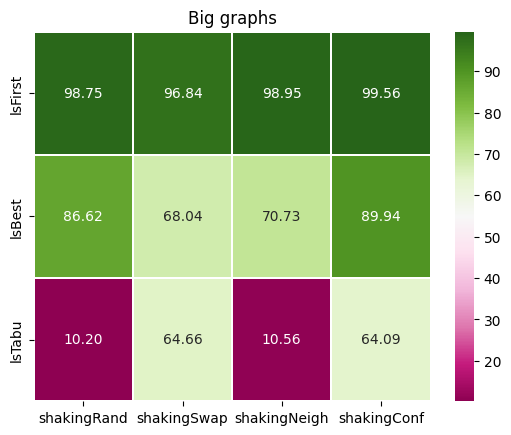

In [6]:
view("resultsVNS", "(big)", "Big")

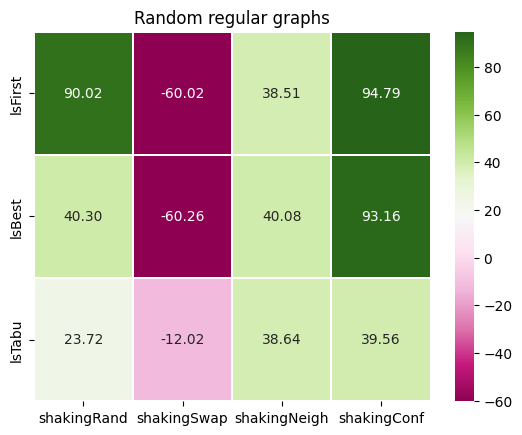

In [62]:
view("resultsVNS","(random)","Random regular")

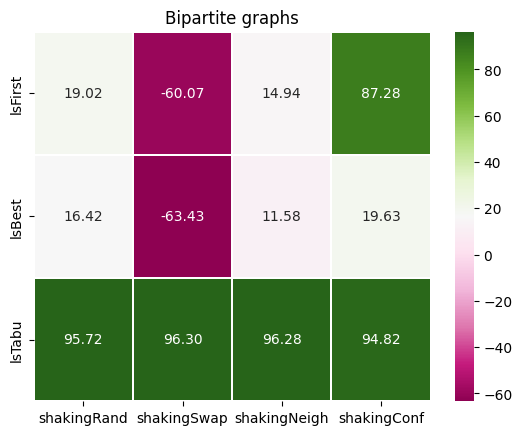

In [63]:
view("resultsVNS","(Bipartite)","Bipartite")

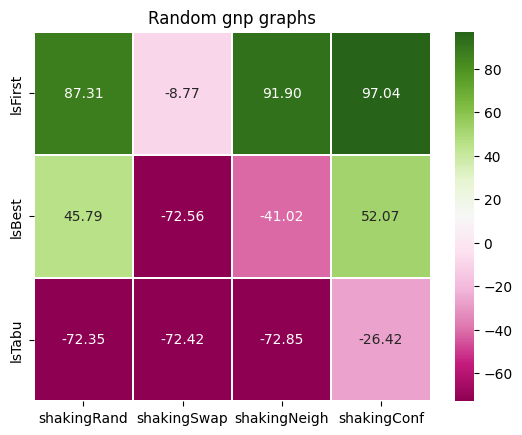

In [64]:
view("resultsVNS","(graph)\\d*_","Random gnp")

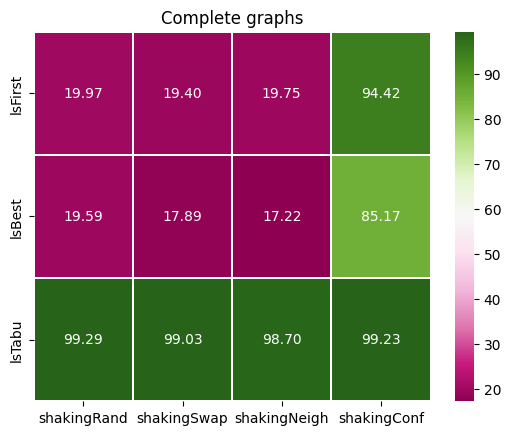

In [65]:
view("resultsVNS","(completeGraph)","Complete")

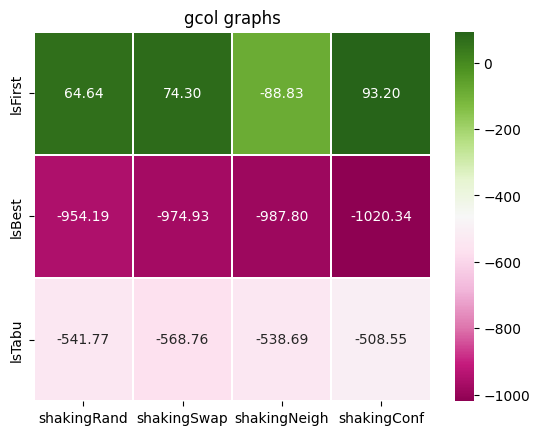

In [6]:
view("resultsVNS","(gcol)","gcol")